**Objective:**
The objective of this assignment is to demonstrate the application of L1 (Lasso) and L2 (Ridge) regularization techniques in linear regression. You will implement these regularizations and apply optimization algorithms (such as Gradient Descent) to train models on a dataset.

**Problem Description:**
You are tasked with building a linear regression model with both L1 (Lasso) and L2 (Ridge) regularization to minimize overfitting. You will:

**Load a dataset.**
Split it into training and testing sets.
Implement L1 and L2 regularization.
Implement gradient descent optimization to minimize the loss.
Evaluate the models' performance on the test set.

**Dataset:**
You will use the California housing dataset. This dataset contains information about various attributes of homes in California and is often used for regression tasks.

**Features:** longitude, latitude, housing median age, total rooms, total bedrooms, population, households, median income, median house value, etc.

**Target:** The target is the median house value.
You can load the dataset from the sklearn.datasets library.

**Steps:**



In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data=fetch_california_housing()
X,y=data.data, data.target
y = np.log1p(y)  # took log transform due to skewness


In [2]:
df=pd.DataFrame(X, columns=data.feature_names)
df['Target']= y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,1.709464
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,1.522790
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,1.508733
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,1.484555
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,1.486592


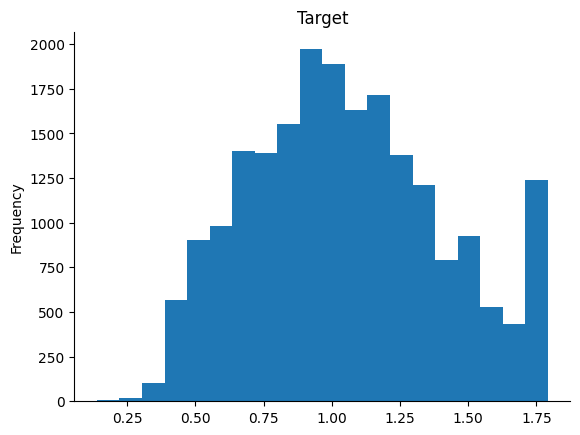

In [3]:
df['Target'].plot(kind='hist', bins=20, title='Target')
plt.gca().spines[['top', 'right',]].set_visible(False)

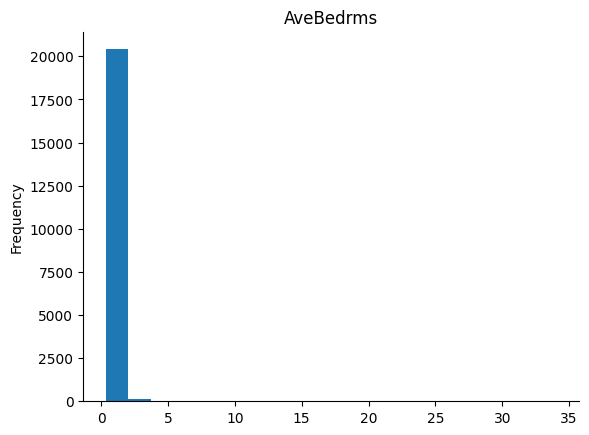

In [4]:
df['AveBedrms'].plot(kind='hist', bins=20, title='AveBedrms')
plt.gca().spines[['top', 'right',]].set_visible(False)

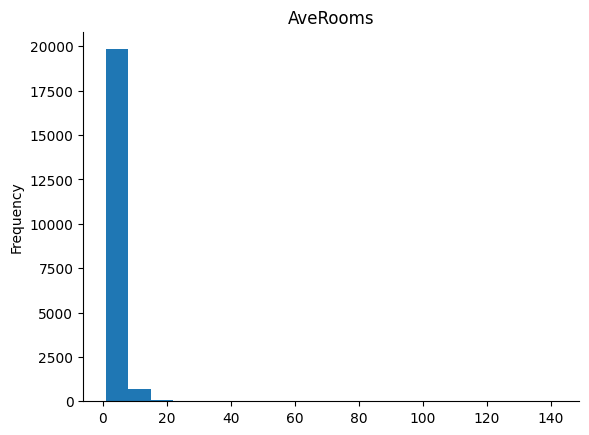

In [5]:

df['AveRooms'].plot(kind='hist', bins=20, title='AveRooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

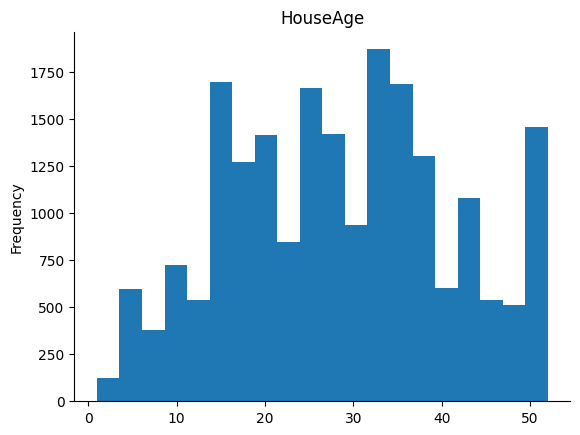

In [6]:
df['HouseAge'].plot(kind='hist', bins=20, title='HouseAge')
plt.gca().spines[['top', 'right',]].set_visible(False)

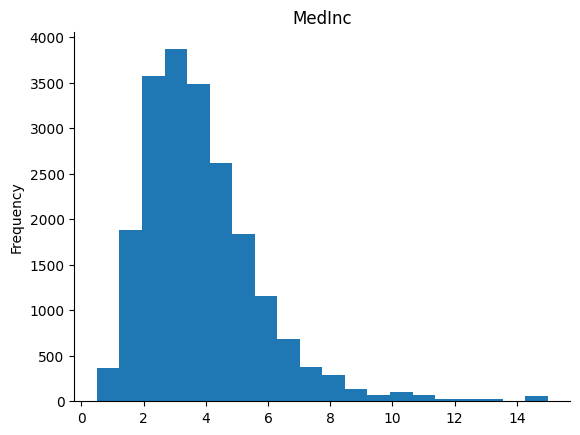

In [7]:

df['MedInc'].plot(kind='hist', bins=20, title='MedInc')
plt.gca().spines[['top', 'right',]].set_visible(False)

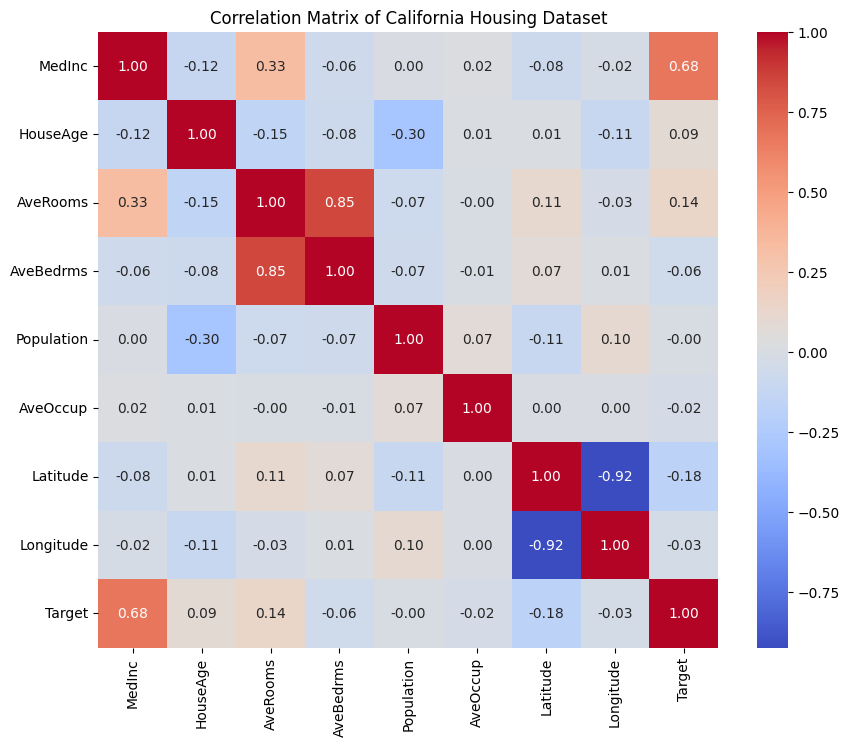

In [8]:
import seaborn as sns
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of California Housing Dataset")
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pd.DataFrame(X_train_scaled, columns=data.feature_names).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.133506,0.509357,0.181060,-0.273850,-0.184117,-0.010825,-0.805682,0.780934
1,-0.532218,-0.679873,-0.422630,-0.047868,-0.376191,-0.089316,-1.339473,1.245270
2,0.170990,-0.362745,0.073128,-0.242600,-0.611240,-0.044800,-0.496645,-0.277552
3,-0.402916,-1.155565,0.175848,-0.008560,-0.987495,-0.075230,1.690024,-0.706938
4,-0.299285,1.857152,-0.259598,-0.070993,0.086015,-0.066357,0.992350,-1.430902


In [10]:
def predict(X, theta):
    return np.dot(X, theta)

def cost_function_l1(X, y, theta, lambda_):
    m = len(y)
    predictions = predict(X, theta)
    cost = (1/(2*m)) * np.sum((predictions - y) ** 2) + lambda_ * np.sum(np.abs(theta))
    return cost

def cost_function_l2(X, y, theta, lambda_):
    m = len(y)
    predictions = predict(X, theta)
    cost = (1/(2*m)) * np.sum((predictions - y) ** 2) + (lambda_ / 2) * np.sum(theta ** 2)
    return cost



In [11]:
from sklearn.metrics import mean_squared_error
def compute_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def gradient_descent_l1(X, y, theta, alpha, lambda_, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        predictions = predict(X, theta)
        errors = predictions - y
        gradient = (1/m) * np.dot(X.T, errors) + lambda_ * np.sign(theta)
        theta -= alpha * gradient
        cost = cost_function_l1(X, y, theta, lambda_)
        cost_history.append(cost)

        # if i % 100 == 0:
        #     print(f"Iteration {i}: Cost = {cost}")

    return theta, cost_history

def gradient_descent_l2(X, y, theta, alpha, lambda_, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = predict(X, theta)
        errors = predictions - y
        gradient = (1/m) * np.dot(X.T, errors) + lambda_ * theta
        theta -= alpha * gradient
        cost = cost_function_l2(X, y, theta, lambda_)
        cost_history.append(cost)

        # if i % 100 == 0:
            # print(f"Iteration {i}: Cost = {cost}")

    return theta, cost_history



L1 Regularization Gradient:
∂/∂𝜃=𝑋T(𝑦−𝑦^)+𝜆⋅sign(𝜃)

L2 Regularization Gradient:
∂/∂𝜃=𝑋T(𝑦−𝑦^)+2𝜆⋅𝜃


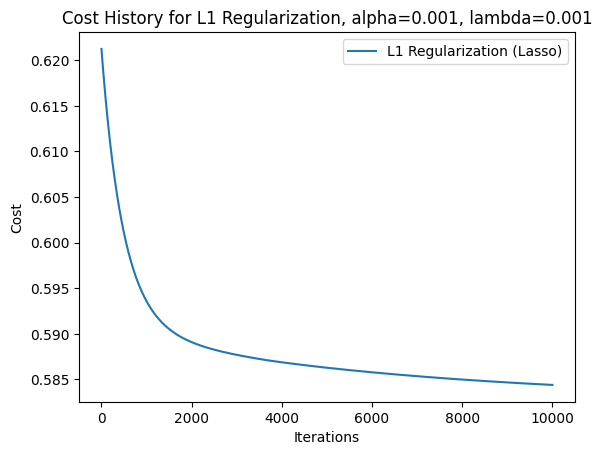

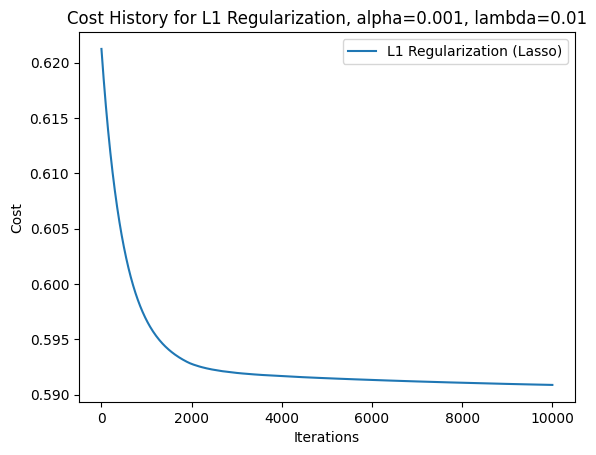

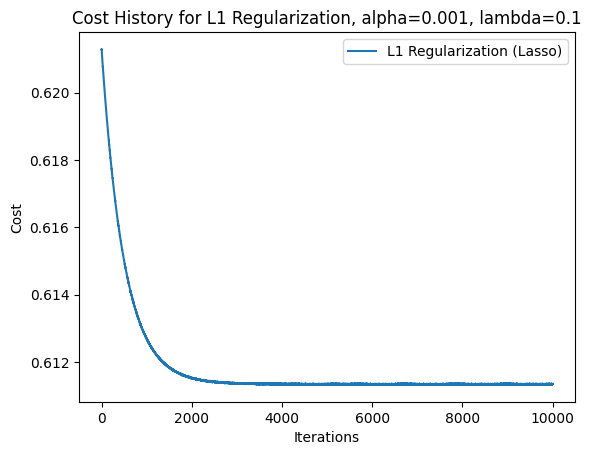

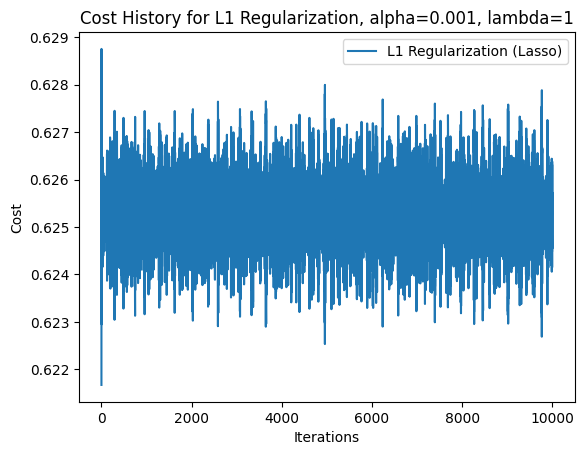

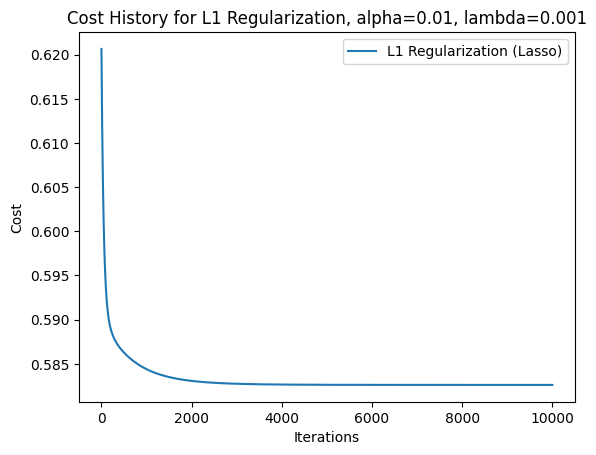

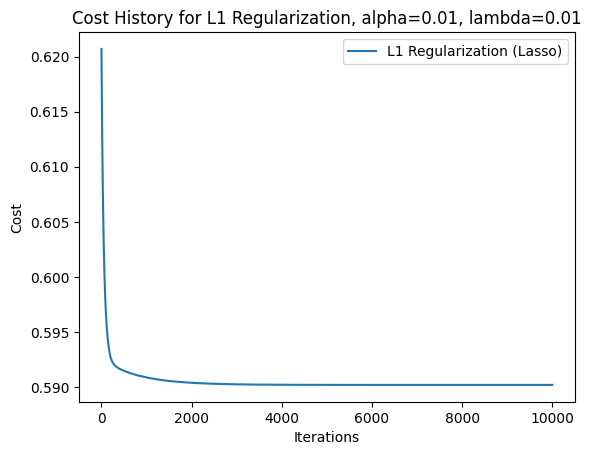

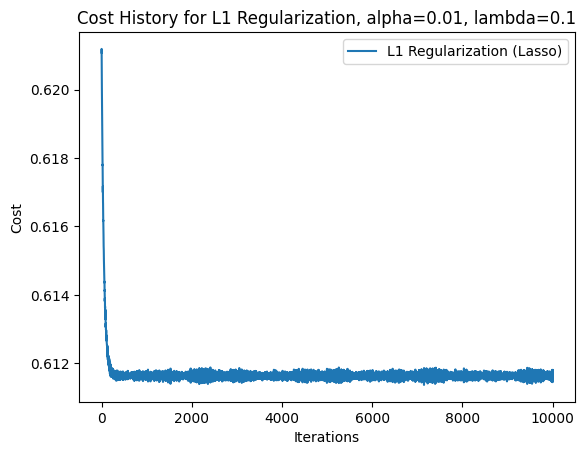

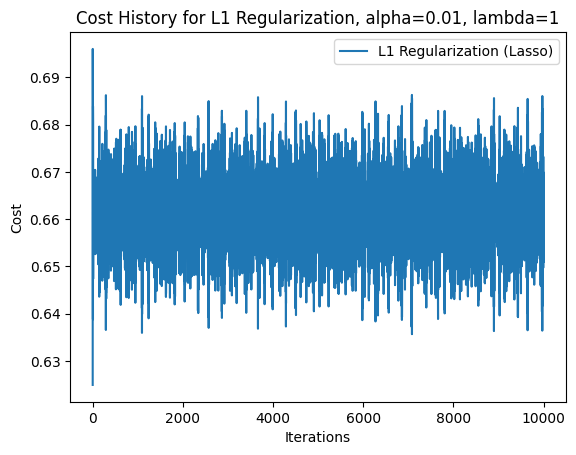

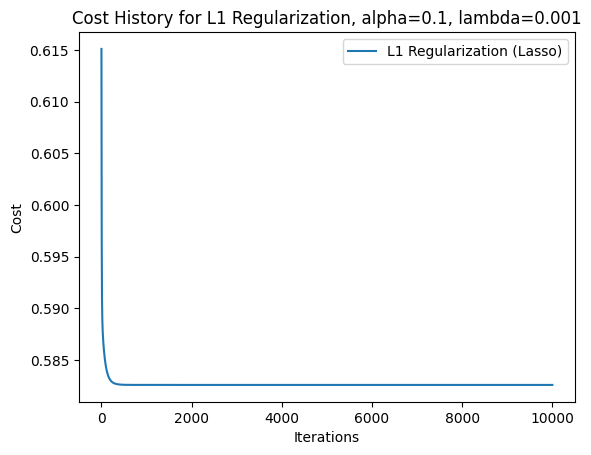

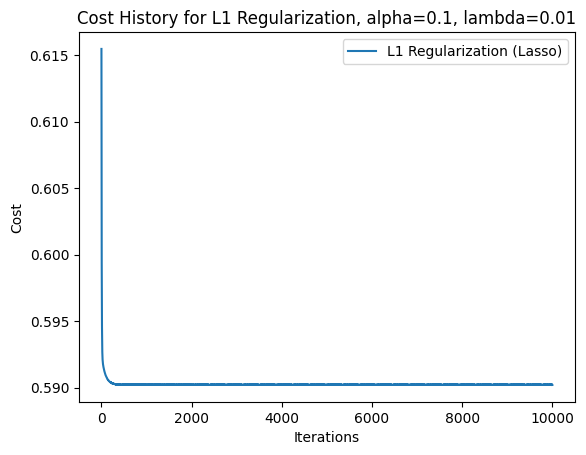

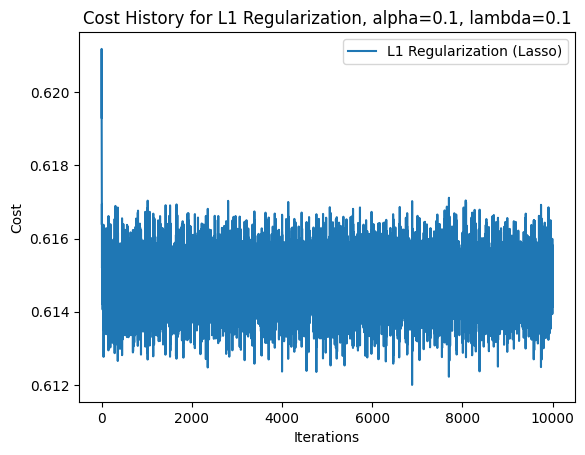

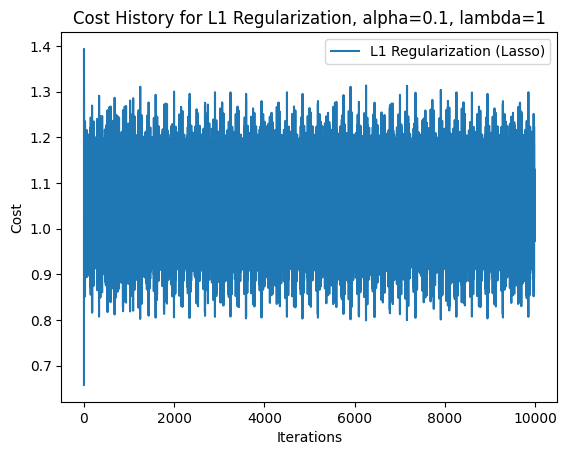

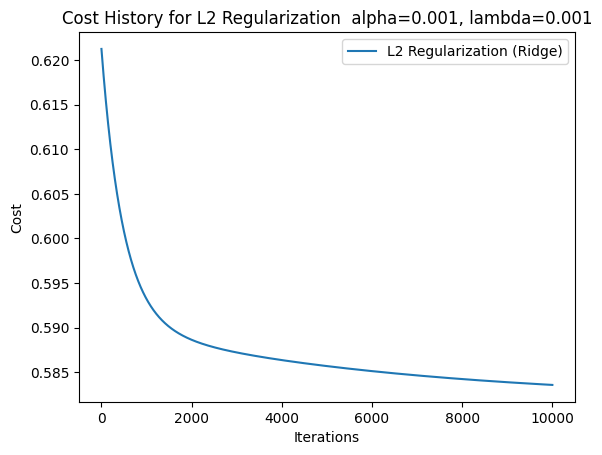

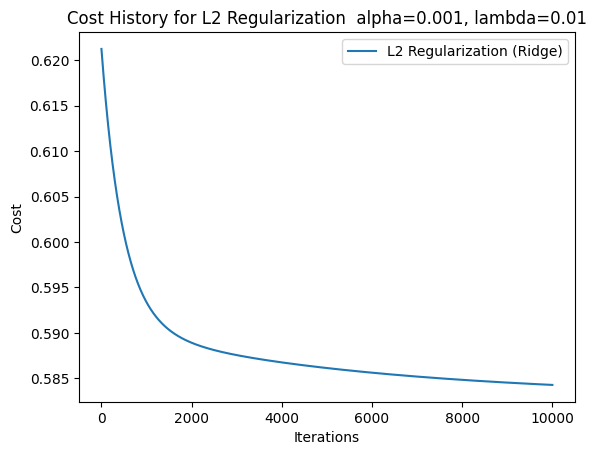

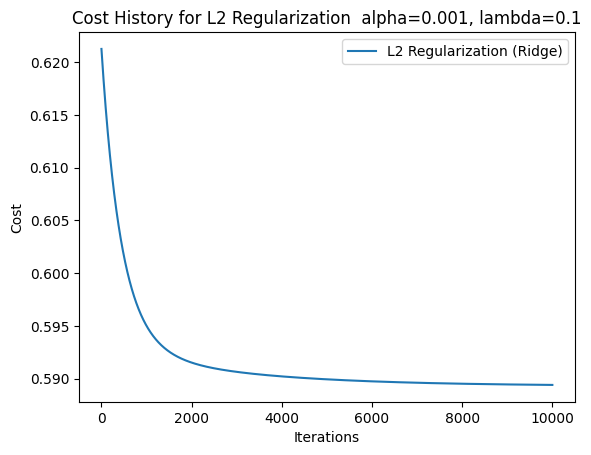

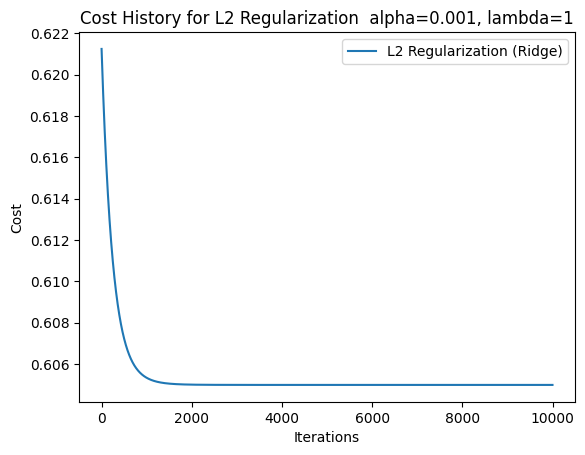

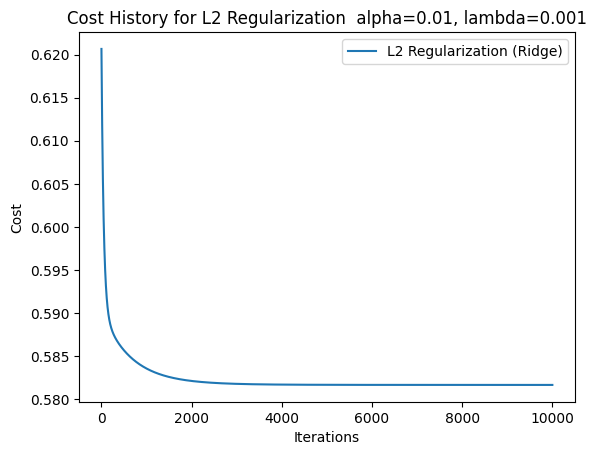

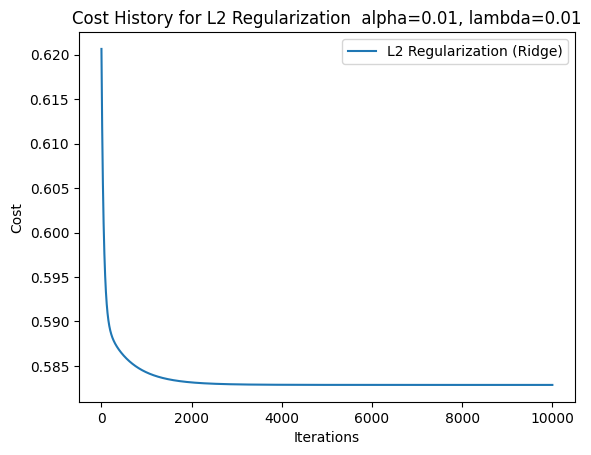

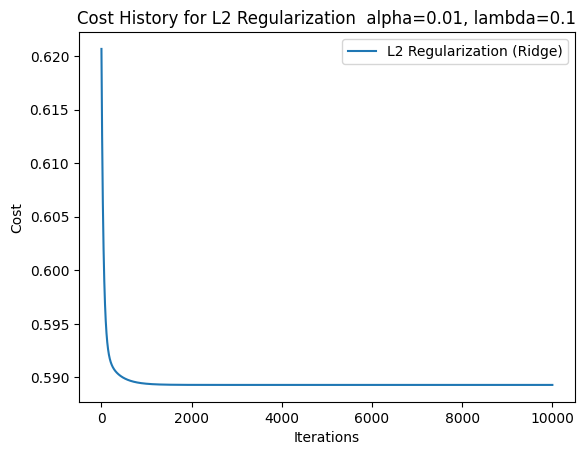

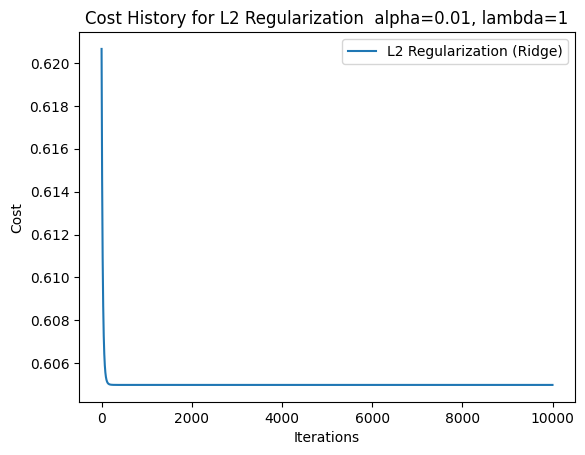

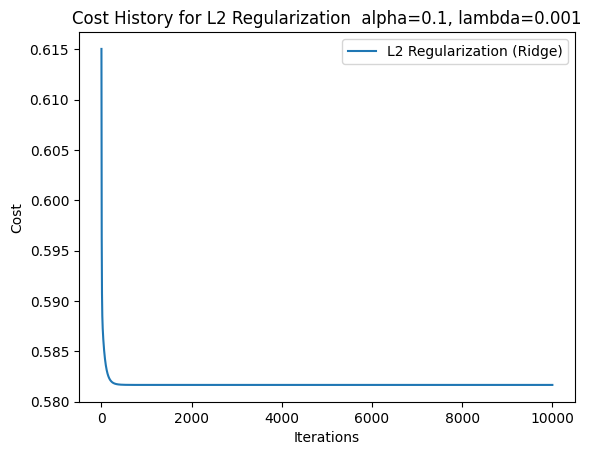

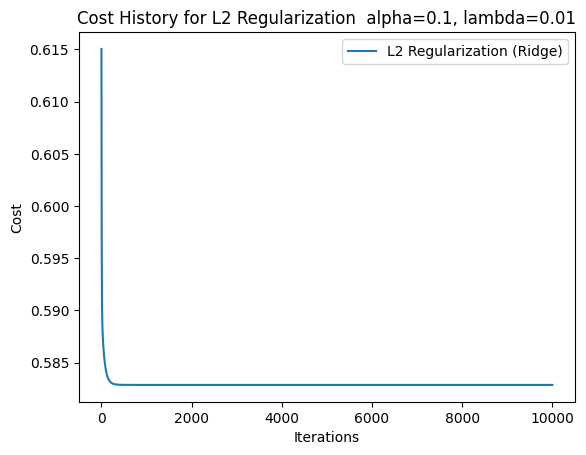

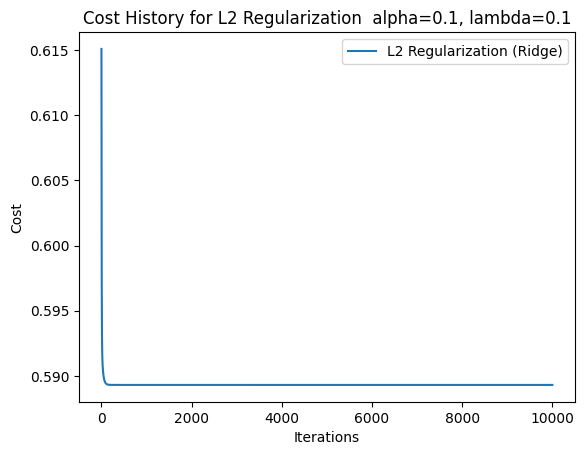

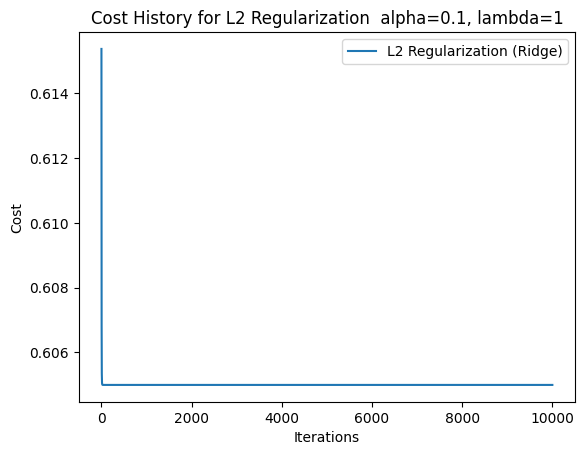



Best RMSE for L1 Regularization (Lasso): 2.228428924442051
Best alpha for L1 Regularization: 0.1
Best lambda for L1 Regularization: 0.001
Best RMSE for L2 Regularization (Ridge): 2.229054552377335
Best alpha for L2 Regularization: 0.1
Best lambda for L2 Regularization: 0.001


In [12]:
alpha_values = [0.001, 0.01, 0.1]
lambda_values = [0.001,0.01, 0.1, 1]

# for tuning
best_rmse_l1 = float('inf')
best_alpha_l1 = None
best_lambda_l1 = None

best_rmse_l2 = float('inf')
best_alpha_l2 = None
best_lambda_l2 = None

iterations = 10000

for alpha in alpha_values:
    for lambda_ in lambda_values:
        theta_l1 = np.zeros(X_train_scaled.shape[1])
        theta_l1, cost_history_l1 = gradient_descent_l1(X_train_scaled, y_train, theta_l1, alpha, lambda_, iterations)
        y_pred_l1 = np.dot(X_test_scaled, theta_l1)
        rmse_l1 = compute_rmse(np.expm1(y_test), np.expm1(y_pred_l1))
        plt.plot(cost_history_l1, label="L1 Regularization (Lasso)")
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.title(f"Cost History for L1 Regularization, alpha={alpha}, lambda={lambda_}")
        plt.legend()
        plt.show()
        print("\n")
        if rmse_l1 < best_rmse_l1:
            best_rmse_l1 = rmse_l1
            best_alpha_l1 = alpha
            best_lambda_l1 = lambda_

for alpha in alpha_values:
    for lambda_ in lambda_values:
        theta_l2 = np.zeros(X_train_scaled.shape[1])
        theta_l2, cost_history_l2 = gradient_descent_l2(X_train_scaled, y_train, theta_l2, alpha, lambda_, iterations)
        y_pred_l2 = np.dot(X_test_scaled, theta_l2)
        rmse_l2 = compute_rmse(np.expm1(y_test), np.expm1(y_pred_l2))
        plt.plot(cost_history_l2, label="L2 Regularization (Ridge)")
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.title(f"Cost History for L2 Regularization  alpha={alpha}, lambda={lambda_}")
        plt.legend()
        plt.show()
        print("\n")
        if rmse_l2 < best_rmse_l2:
            best_rmse_l2 = rmse_l2
            best_alpha_l2 = alpha
            best_lambda_l2 = lambda_

print(f"Best RMSE for L1 Regularization (Lasso): {best_rmse_l1}")
print(f"Best alpha for L1 Regularization: {best_alpha_l1}")
print(f"Best lambda for L1 Regularization: {best_lambda_l1}")

print(f"Best RMSE for L2 Regularization (Ridge): {best_rmse_l2}")
print(f"Best alpha for L2 Regularization: {best_alpha_l2}")
print(f"Best lambda for L2 Regularization: {best_lambda_l2}")




In [15]:
# The following is the code to see RMSE for all aplhas and lambdas,
#can be skipped

results = []
for alpha in alpha_values:
    for lambda_ in lambda_values:
        theta_l1 = np.zeros(X_train_scaled.shape[1])
        theta_l1, cost_history_l1 = gradient_descent_l1(X_train_scaled, y_train, theta_l1, alpha, lambda_, iterations)
        y_pred_l1 = np.dot(X_test_scaled, theta_l1)
        rmse_l1 = compute_rmse(np.expm1(y_test), np.expm1(y_pred_l1))
        results.append(['L1 (Lasso)', alpha, lambda_, rmse_l1])


for alpha in alpha_values:
    for lambda_ in lambda_values:
        theta_l2 = np.zeros(X_train_scaled.shape[1])
        theta_l2, cost_history_l2 = gradient_descent_l2(X_train_scaled, y_train, theta_l2, alpha, lambda_, iterations)
        y_pred_l2 = np.dot(X_test_scaled, theta_l2)
        rmse_l2 = compute_rmse(np.expm1(y_test), np.expm1(y_pred_l2))
        results.append(['L2 (Ridge)', alpha, lambda_, rmse_l2])


results_df = pd.DataFrame(results, columns=['Reg Type', 'Alpha', 'Lambda', 'RMSE'])
print(results_df)
results_df.to_csv('regularization_results.csv', index=False)


      Reg Type  Alpha  Lambda      RMSE
0   L1 (Lasso)  0.001   0.001  2.236991
1   L1 (Lasso)  0.001   0.010  2.247496
2   L1 (Lasso)  0.001   0.100  2.307645
3   L1 (Lasso)  0.001   1.000  2.363114
4   L1 (Lasso)  0.010   0.001  2.228513
5   L1 (Lasso)  0.010   0.010  2.242251
6   L1 (Lasso)  0.010   0.100  2.307632
7   L1 (Lasso)  0.010   1.000  2.362738
8   L1 (Lasso)  0.100   0.001  2.228429
9   L1 (Lasso)  0.100   0.010  2.242202
10  L1 (Lasso)  0.100   0.100  2.306293
11  L1 (Lasso)  0.100   1.000  2.388746
12  L2 (Ridge)  0.001   0.001  2.236081
13  L2 (Ridge)  0.001   0.010  2.237803
14  L2 (Ridge)  0.001   0.100  2.252595
15  L2 (Ridge)  0.001   1.000  2.310984
16  L2 (Ridge)  0.010   0.001  2.229164
17  L2 (Ridge)  0.010   0.010  2.230869
18  L2 (Ridge)  0.010   0.100  2.250963
19  L2 (Ridge)  0.010   1.000  2.310984
20  L2 (Ridge)  0.100   0.001  2.229055
21  L2 (Ridge)  0.100   0.010  2.230846
22  L2 (Ridge)  0.100   0.100  2.250963
23  L2 (Ridge)  0.100   1.000  2.310984


**Deliverables:**
1.Code for implementing L1 and L2 regularization with gradient descent.

2.Evaluation results (RMSE for both L1 and L2 models).

3.Visual representation of the cost history.

4.Discussion on the effect of regularization on model performance and overfitting.


NOTE
> Comments in Python code must be present explaining the necessary variables, functions, and

> In your Report, content should present or each Task with your observations and a final conclusion

> The Report should be made in latex and Tex files should be submitted too



RMSE for L1 Regularization (Lasso): 2.228428924442051
RMSE for L2 Regularization (Ridge): 2.229054552377335


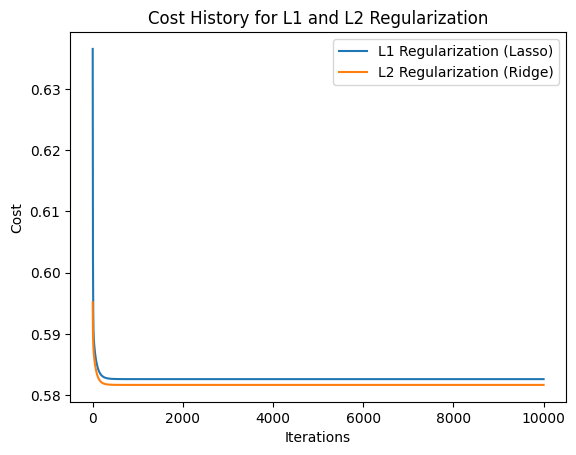

In [14]:
theta_l1, cost_history_l1 = gradient_descent_l1(X_train_scaled, y_train, theta_l1, best_alpha_l1, best_lambda_l1, iterations)
y_pred_l1 = np.dot(X_test_scaled, theta_l1)
rmse_l1 = compute_rmse(np.expm1(y_test), np.expm1(y_pred_l1))  # Inverse of log1p to get back original scale

theta_l2, cost_history_l2 = gradient_descent_l2(X_train_scaled, y_train, theta_l2, best_alpha_l2, best_lambda_l2, iterations)
y_pred_l2 = np.dot(X_test_scaled, theta_l2)
rmse_l2 = compute_rmse(np.expm1(y_test), np.expm1(y_pred_l2))  # Inverse of log1p to get back original scale

print(f"RMSE for L1 Regularization (Lasso): {rmse_l1}")
print(f"RMSE for L2 Regularization (Ridge): {rmse_l2}")

plt.plot(cost_history_l1, label="L1 Regularization (Lasso)")
plt.plot(cost_history_l2, label="L2 Regularization (Ridge)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
# plt.ylim((0.5,1.5))
plt.title("Cost History for L1 and L2 Regularization")
plt.legend()
plt.show()